# <center> Stock prices analysis </center>

![](https://sundeeppothula1993.github.io/ARTML//assets/img/Stocks.png)

In [1]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [2]:
# Change default background color for all visualizations
layout = go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'

Usually, the first thing that comes to your mind when you think of a stock is a price chart. You can see how the price of a particular stock changes over time. However, there are many other important plots or statistics that can improve your understanding of stock behavior, such as trend or momentum. 

Investors and traders all over the world try to predict future prices, but it is possible up to a certain level of accuracy. 

# Part 1. Technical Analysis

Investors often use **technical analysis** to predict market events. It is well suited for short-term strategies and is based on the study of patterns in price changes in the past.

To identify patterns of such regularities, the investor analyzes the price chart of the desired financial instrument (stocks, futures, etc.).

In order to make a forecast, analysts using technical analysis study the dynamics of price changes, information on trading volumes and other statistical data. To facilitate this process, specialized attributes and indicators are used. Here are the most popular ones:

* **Moving Average (MA)**. This indicator displays the average n past values ​​up to the current moment;
* **Exponential Moving Average (EMA)**. Gives more weight to the most recent values, but does not discard the old values ​​completely;
* **Momentum or rate of change (Rate of Change, RoC)**, - one of the simplest technical indicators, the difference between the current price and the price n periods ago;
* **Index of relative strength (Relative Strength Index, RSI)**. Determines the strength of the trend and the likelihood of its change within a certain time (usually 9-14 days).

In this notebook we will explore history of the Vanguard S&P 50(VOO) exchange traded fund. The fund is sponsored by one of the leaders in low-cost ETF investing, Vanguard,  and the fund itself has a massive $520 billion in assets. 

Data set: [Huge Stock Market Dataset](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs)

The author provided the full historical daily price and volume data for all US-based stocks and ETFs trading on the NYSE, NASDAQ, and NYSE MKT. By the way, high-quality financial data is expensive to acquire, and it is a rare case when it's shared for free. 

The data contains: Date, Open, High, Low, Close, Volume, OpenInt. The prices have been adjusted for dividends and splits.

In [3]:
df = pd.read_csv('./ETFs/voo.us.txt')

## OHLC Chart

An OHLC chart shows the open, high, low and close prices of a stock. It shows you how the price was changing during a particular day and give you a sense of e.g. momentum or volatility of stock. The tip of the lines represent the low and high values and the horizontal segments represent the open and close values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing items are drawn in green whereas decreasing are drawn in red.

In [5]:
# RUN THIS CELL TO SEE A PLOT (the same action is requiered for other cells below)

go.Figure([go.Ohlc(x=df.Date,
                   open=df.Open,
                   high=df.High,
                   low=df.Low,
                   close=df.Close)], 
          layout_xaxis_rangeslider_visible=False)

## Volume

A volume is a very basic measure that shows a number of shares traded (bought, sold) over a certain period of time e.g. daily. It is such a simple but often overlooked indicator. Volume is so important because it basically represents the activity in stock trading. Higher volume value indicates higher interests in trading a stock.

In [6]:
go.Figure(go.Bar(x=df.Date, y=df.Volume, name='Volume'))

## Moving Average

[Moving Average](https://www.investopedia.com/terms/m/movingaverage.asp) (MA) helps to smooth out stock prices on a chart by filtering out short-term price fluctuations. We calculate moving averages over a defined period of time e.g. last 10, 50 or 300 days. There are two (most common) averages used in technical analysis which are:
* *Simple Moving Average (SMA)* - a simple average calculated over last N days e.g. 50, 100 or 300,
* *Exponential Moving Average (EMA)* - an average where greater weights are applied to recent prices.

In [6]:
# Shift index by desired number of periods without realigning the data
df['EMA_10'] = df['Close'].ewm(span=10).mean().shift()
df['SMA_50'] = df['Close'].rolling(50).mean().shift()
df['SMA_100'] = df['Close'].rolling(100).mean().shift()
df['SMA_300'] = df['Close'].rolling(300).mean().shift()

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_10, name='EMA 10'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_50, name='SMA 50'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_100, name='SMA 100'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_300, name='SMA 300'))
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

## Relative Strength Index (RSI)

[RSI](https://www.investopedia.com/terms/r/rsi.asp) indicates the magnitude of recent price changes. It can show that a stock is either *overbought* or *oversold*. Typically RSI value of 70 and above signal that a stock is becoming overbought/overvalued, meanwhile a value of 30 and less can mean that it is oversold. The full range of RSI is from 0 to 100.

In [9]:
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp, pricesDown = delta.copy(), delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

num_days = 365
df['RSI'] = RSI(df).fillna(0)

In [10]:
fig = go.Figure(go.Scatter(x=df.Date.tail(num_days), y=df.RSI.tail(num_days)))
fig.show()

In [13]:
os.chdir('./huge_stock/Data/Stocks/')

filenames = random.sample([x for x in os.listdir() if x.endswith('.txt')], 8)
print(filenames)

['mdb.us.txt', 'ogen.us.txt', 'mant.us.txt', 'recn.us.txt', 'c.us.txt', 'esp.us.txt', 'vbfc.us.txt', 'twnkw.us.txt']


### Read data from 8 files into dataframes

In [58]:
data = []
for filename in filenames:
    df = pd.read_csv(filename, sep=',')
    label = filename.split(sep='.')[0]
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])

    data.append(df)

In [47]:
# Relative Strength Index 
# Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
# Where: PriceUp(t) = 1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
#        PriceDown(t) = -1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};

def rsi(values):
    up = values[values > 0].mean()
    down = -1 * values[values < 0].mean()
    return 100 * up / (up + down)

fhb (322, 8)
amag (3198, 8)
ctek (189, 8)
ilg (2330, 8)
micr (3045, 8)
tcmd (327, 8)
corr_a (679, 8)
csgp (3201, 8)


Add Momentum_1Day column for all 8 stocks.

In [59]:
from tqdm import tqdm

In [60]:
# Momentum_1Day = P(t) - P(t-1)

for stock in tqdm(range(len(data))):
    data[stock]['Momentum_1Day'] = (data[stock]['Close'] - data[stock]['Close'].shift(1)).fillna(0)
    data[stock]['RSI_14Days'] = data[stock]['Momentum_1Day'].rolling(center=False, window=14).apply(rsi).fillna(0)

data[0].tail(5)

100%|██████████| 8/8 [00:09<00:00,  1.19s/it]


,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1Day,RSI_14Days
317,2017-11-06,29.30,29.36,29.01,29.24,115421,0,fhb,-0.13,42.553191
318,2017-11-07,29.21,29.32,28.07,28.09,164327,0,fhb,-1.15,36.223507
319,2017-11-08,28.04,28.22,27.67,27.94,172122,0,fhb,-0.15,39.404553
320,2017-11-09,27.78,28.10,27.39,27.60,223652,0,fhb,-0.34,38.211382
321,2017-11-10,27.71,27.83,27.45,27.73,257569,0,fhb,0.13,36.435868


In [62]:
# Price Volume Trend (PVT) 
for stock in range(len(data)):
    data[stock]["PVT"] = (data[stock]['Momentum_1Day']/ data[stock]['Close'].shift(1))*data[stock]['Volume']
    data[stock]["PVT"] = data[stock]["PVT"]-data[stock]["PVT"].shift(1)
    data[stock]["PVT"] = data[stock]["PVT"].fillna(0)
    
data[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1Day,RSI_14Days,PVT
317,2017-11-06,29.30,29.36,29.01,29.24,115421,0,fhb,-0.13,42.553191,-121.946360
318,2017-11-07,29.21,29.32,28.07,28.09,164327,0,fhb,-1.15,36.223507,-5952.042928
319,2017-11-08,28.04,28.22,27.67,27.94,172122,0,fhb,-0.15,39.404553,5543.801403
320,2017-11-09,27.78,28.10,27.39,27.60,223652,0,fhb,-0.34,38.211382,-1802.478496
321,2017-11-10,27.71,27.83,27.45,27.73,257569,0,fhb,0.13,36.435868,3934.793618


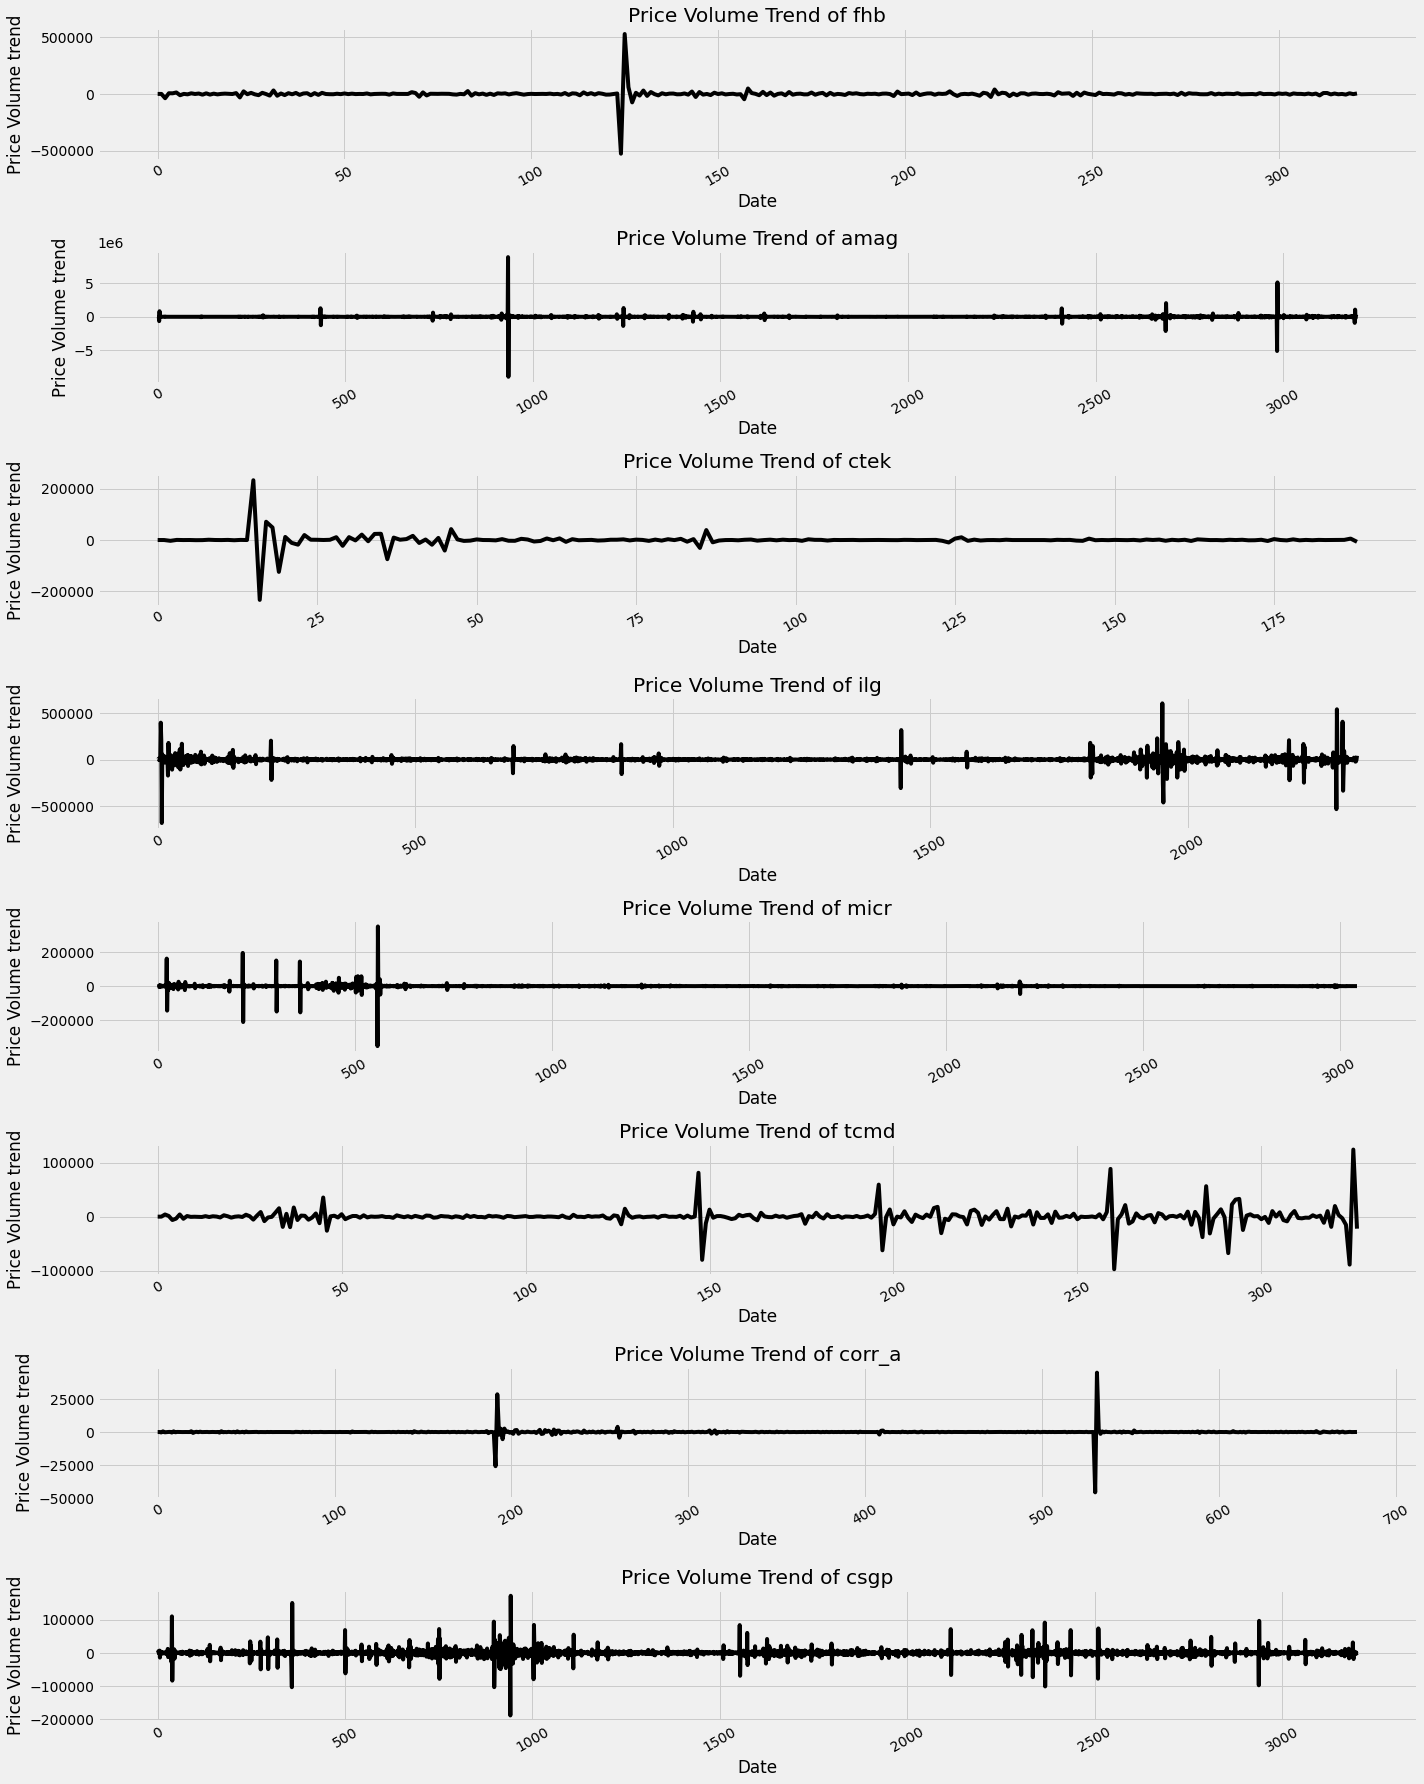

In [67]:
# Price Volume Trend (PVT) Plot
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(8,1,i + 1)
    ax.plot(data[i].index, data[i]['PVT'], 'black')
    ax.set_title("Price Volume Trend of " + str(data[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price Volume trend")
fig.tight_layout()

In [63]:
def abands(df):
    df['AB_Middle_Band'] = df['Close'].rolling(window = 20, center=False).mean()
    
    # High * ( 1 + 4 * (High - Low) / (High + Low))
    df['aupband'] = df['High'] * (1 + 4 * (df['High'] - df['Low']) / (df['High'] + df['Low']))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=20, center=False).mean()
    
    # Low *(1 - 4 * (High - Low)/ (High + Low))
    df['adownband'] = df['Low'] * (1 - 4 * (df['High'] - df['Low']) / (df['High'] + df['Low']))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=20, center=False).mean()

In [65]:
for stock in range(len(data)):
    abands(data[stock])
    data[stock] = data[stock].fillna(0)
    
data[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Momentum_1Day,RSI_14Days,PVT,AB_Middle_Band,aupband,AB_Upper_Band,adownband,AB_Lower_Band
317,2017-11-06,29.30,29.36,29.01,29.24,115421,0,fhb,-0.13,42.553191,-121.946360,29.6900,30.064197,31.230344,28.314197,28.041844
318,2017-11-07,29.21,29.32,28.07,28.09,164327,0,fhb,-1.15,36.223507,-5952.042928,29.5940,31.874452,31.265087,25.624452,27.897837
319,2017-11-08,28.04,28.22,27.67,27.94,172122,0,fhb,-0.15,39.404553,5543.801403,29.5105,29.330825,31.136414,26.580825,27.844164
320,2017-11-09,27.78,28.10,27.39,27.60,223652,0,fhb,-0.34,38.211382,-1802.478496,29.4080,29.538169,31.085604,25.988169,27.705854
321,2017-11-10,27.71,27.83,27.45,27.73,257569,0,fhb,0.13,36.435868,3934.793618,29.3100,28.595224,30.954058,26.695224,27.651808


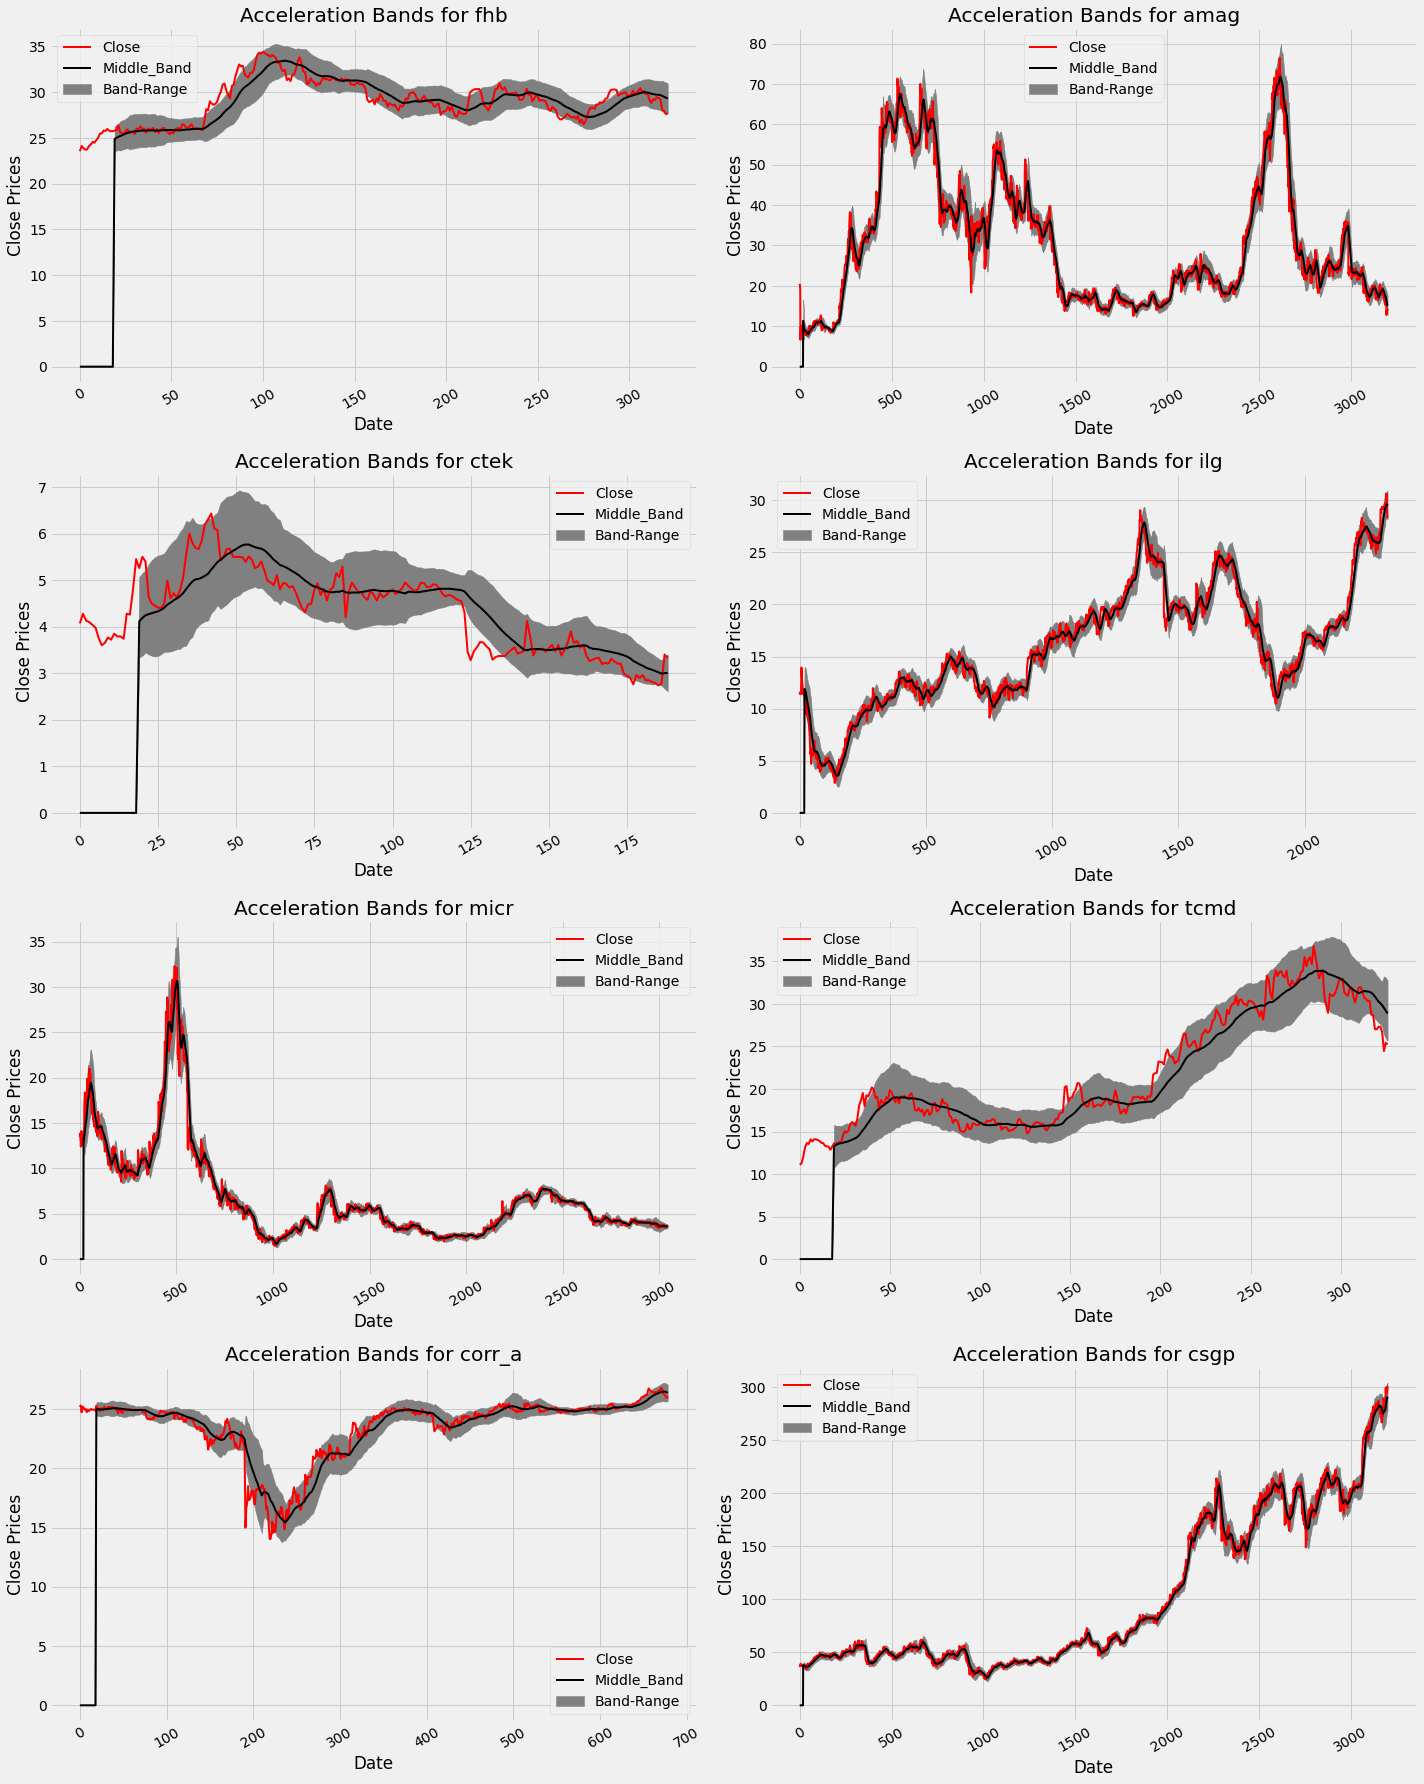

In [68]:
plt.style.use('fivethirtyeight')

# Acceleration band Plot

fig = plt.figure(figsize=(20,25))

for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(data[i].index, data[i]['AB_Upper_Band'], data[i]['AB_Lower_Band'], 
                    color='grey', label = "Band-Range")
    
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(data[i].index, data[i]['Close'], color='red', lw=2, label = "Close")
    ax.plot(data[i].index, data[i]['AB_Middle_Band'], color='black', lw=2, label="Middle_Band")
    ax.set_title("Acceleration Bands for " + str(data[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
    
fig.tight_layout()

In [71]:
def aroon(df, tf=25):
    aroon_up = []
    aroon_down = []
    x = tf
    while x < len(df['Date']):
        aroon_up_count = ((df['High'][x - tf:x].tolist().index(max(df['High'][x - tf:x])))/float(tf))*100
        aroon_down_count = ((df['Low'][x - tf:x].tolist().index(min(df['Low'][x - tf:x])))/float(tf))*100
        aroon_up.append(aroon_up_count)
        aroon_down.append(aroon_down_count)
        x += 1
    return aroon_up, aroon_down

In [72]:
for stock in range(len(data)):
    zeros = [0] * 25
    up, down = aroon(data[stock])
    aroon_list = [x - y for x, y in zip(up, down)]
    if len(aroon_list) == 0:
        aroon_list = [0] * data[stock].shape[0]
        data[stock]['Aroon_Oscillator'] = aroon_list
    else:
        data[stock]['Aroon_Oscillator'] = zeros + aroon_list

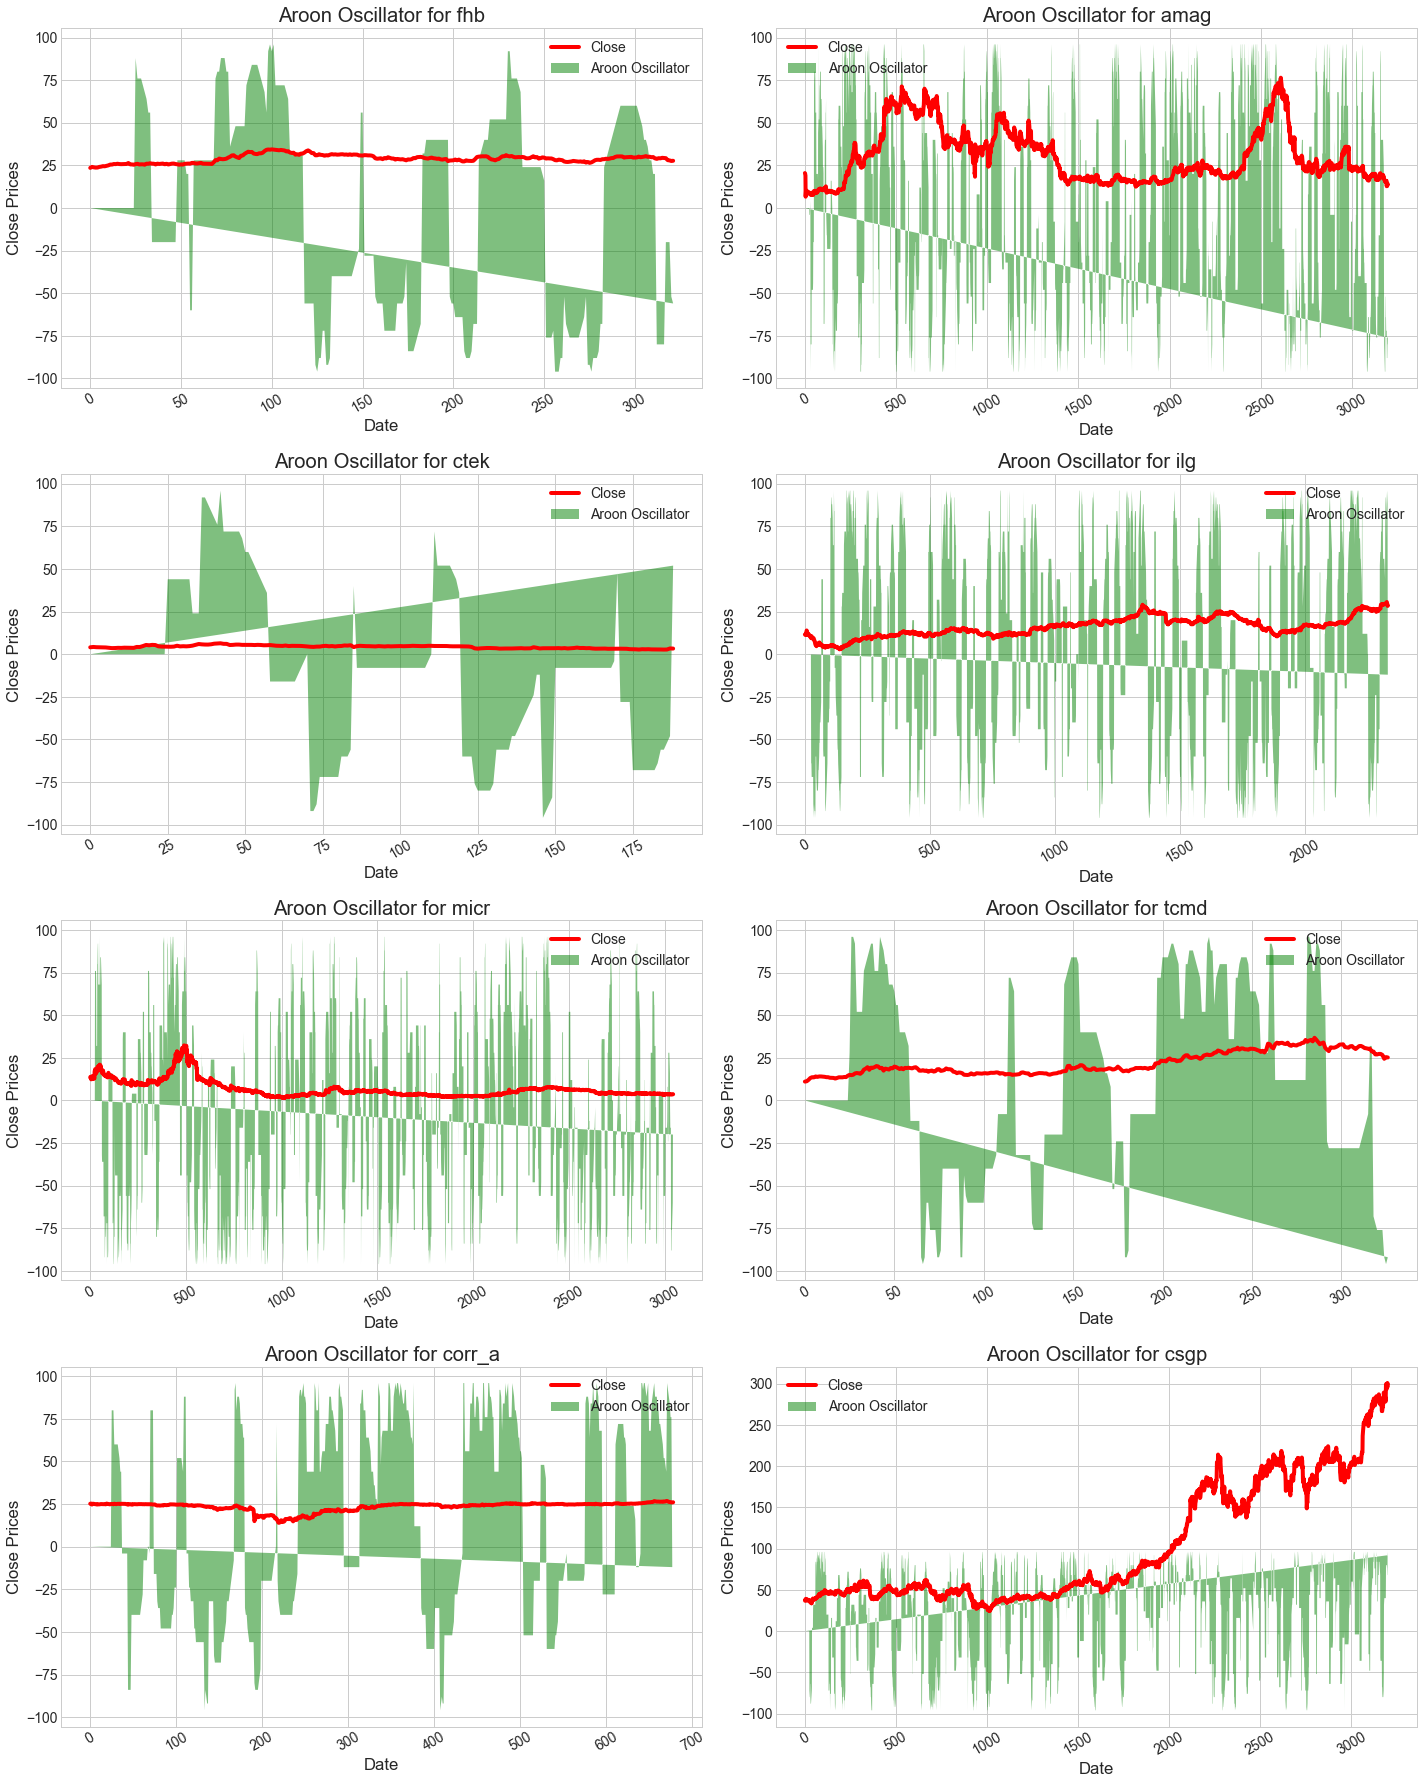

In [73]:
# Aroon Oscillator Plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))

for i in range(8):
    ax = plt.subplot(4,2,i + 1)
    ax.fill(data[i].index, data[i]['Aroon_Oscillator'],'g', alpha = 0.5, label = "Aroon Oscillator")
    ax.plot(data[i].index, data[i]['Close'], 'r', label="Close")
    ax.set_title("Aroon Oscillator for " +str(data[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

**Fundamental analysis** is used to develop long-term strategies and long-term forecasting. With this approach, the financial and production indicators of the company are analyzed, the shares of which are of interest to the investor. They also take into account current political and market trends, take into account various types of risks.

In fundamental analysis, it is important for an investor to collect as much data as possible that can affect the desired asset. It is necessary to assess the impact of events that may yet occur, both in the global economy as a whole and in the country or industry where a particular company operates, in particular.

The difference:

* **Fundamental analysis** - in this case, analysts evaluate information that is more related to the company, whose shares are traded on the stock exchange, than to the shares themselves. Decisions about certain actions in the market are made based on an analysis of the company's previous activities, forecasts of revenues and profits, and so on.

* **Technical analysis** - in this case, the behavior of the stock price is considered and its various patterns are identified (using time series analysis).

# Part 2. Prediction of stock prices using table data

In [14]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error

In [15]:
df = pd.read_csv('/Users/m.ananyeva/week6_economists/Stocks/cern.us.txt')

df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'].dt.year >= 2010)].copy()
df.index = range(len(df))

In [16]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Ohlc(x=df.Date,
                      open=df.Open,
                      high=df.High,
                      low=df.Low,
                      close=df.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.Date, y=df.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [184]:
# Smoothed Moving Average
df['EMA_9'] = df['Close'].ewm(9).mean().shift()
df['SMA_5'] = df['Close'].rolling(5).mean().shift()
df['SMA_10'] = df['Close'].rolling(10).mean().shift()
df['SMA_15'] = df['Close'].rolling(15).mean().shift()
df['SMA_30'] = df['Close'].rolling(30).mean().shift()

df['RSI'] = RSI(df).fillna(0)
EMA_12 = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Close'].ewm(span=26, min_periods=26).mean())

# Moving Average Convergence Divergence
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())

Because we want to predict the next day price, after calculating all features for day $D_{i}$, we shift Close price column by -1 rows. After doing that, for day $D_{i}$ we have features from the same timestamp e.g. $RSI_{i}$, but the price $C_{i+1}$ from upcoming day.

In [185]:
df['Close'] = df['Close'].shift(-1)

In [186]:
df = df.iloc[33:] # Because of moving averages and MACD line
df = df[:-1]      # Because of shifting close price

df.index = range(len(df))

We split stock data frame into 3 subsets: training ($70\%$), validation ($15\%$) and test ($15\%$) sets. We calculate split indices and create three separate frames (train_df, valid_df, test_df). All three frames are ploted in the chart below.

In [187]:
test_size  = 0.15
valid_size = 0.15

test_split_idx  = int(df.shape[0] * (1 - test_size))
valid_split_idx = int(df.shape[0] * (1 - (valid_size + test_size)))

train_df = df.loc[:valid_split_idx].copy()
valid_df = df.loc[valid_split_idx+1:test_split_idx].copy()
test_df = df.loc[test_split_idx+1:].copy()

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.Date, y=train_df.Close, name='Training'))
fig.add_trace(go.Scatter(x=valid_df.Date, y=valid_df.Close, name='Validation'))
fig.add_trace(go.Scatter(x=test_df.Date,  y=test_df.Close,  name='Test'))
fig.show()

In [188]:
# Drop unnecessary columns
drop_cols = ['Date', 'Volume', 'Open', 'Low', 'High', 'OpenInt']

train_df = train_df.drop(drop_cols, 1)
valid_df = valid_df.drop(drop_cols, 1)
test_df  = test_df.drop(drop_cols, 1)

In [189]:
# Split into features and labels
y_train = train_df['Close'].copy()
X_train = train_df.drop(['Close'], 1)

y_valid = valid_df['Close'].copy()
X_valid = valid_df.drop(['Close'], 1)

y_test  = test_df['Close'].copy()
X_test = test_df.drop(['Close'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EMA_9        1362 non-null   float64
 1   SMA_5        1362 non-null   float64
 2   SMA_10       1362 non-null   float64
 3   SMA_15       1362 non-null   float64
 4   SMA_30       1362 non-null   float64
 5   RSI          1362 non-null   float64
 6   MACD         1362 non-null   float64
 7   MACD_signal  1362 non-null   float64
dtypes: float64(8)
memory usage: 85.2 KB


In [ ]:
%%time

parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror')
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

#Best params: {'gamma': 0.001, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 400, 'random_state': 42}
#Best validation score = -1.276573731680407

In [191]:
%%time

model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

CPU times: user 1.55 s, sys: 6.77 ms, total: 1.56 s
Wall time: 402 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

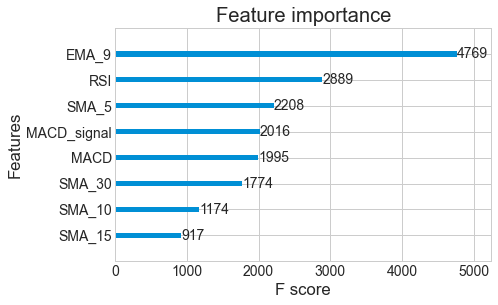

In [192]:
plot_importance(model);

In [193]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [61.48 62.11 62.37 62.98 62.75]
y_pred = [62.011734 61.592194 61.982098 61.982098 61.982098]


In [194]:
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 2.9700259326882277


In [195]:
predicted_prices = df.loc[test_split_idx+1:].copy()
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()

In [196]:
dummy_baseline = pd.concat([pd.Series(62.02, index=[1653]), y_test[:-1]])
dummy_baseline[:5]

print(dummy_baseline[:10])
print(y_test[:10])

1653    62.02
1654    61.48
1655    62.11
1656    62.37
1657    62.98
1658    62.75
1659    61.94
1660    62.15
1661    62.45
1662    61.54
dtype: float64
1654    61.48
1655    62.11
1656    62.37
1657    62.98
1658    62.75
1659    61.94
1660    62.15
1661    62.45
1662    61.54
1663    61.75
Name: Close, dtype: float64


In [197]:
print(f'mean_squared_error = {mean_squared_error(y_test, dummy_baseline)}')

mean_squared_error = 0.7513597938144325


# Part 3. Predicting stock prices based on news texts

A large amount of valuable data that can affect the market situation is available on the web. Most of this information is contained in financial news, company reports, and expert recommendations (such as the blog of insiders and analysts, for example). Basically, this data is presented in text format, which makes it difficult to use. Thus, a new problem is the need to analyze text documents simultaneously with performing time series analysis.

Data set: [Daily News for Stock Market Prediction](https://www.kaggle.com/aaron7sun/stocknews)

Label columns:

* "1" when DJIA Adj Close value rose or stayed as the same;

* "0" when DJIA Adj Close value decreased.

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [141]:
!pwd

/Users/m.ananyeva/week6_economists/huge_stock/Data/Stocks


In [142]:
os.chdir('/Users/m.ananyeva/week6_economists/')

In [143]:
data = pd.read_csv('Combined_News_DJIA.csv')

In [144]:
data.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [145]:
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

- Converting the headline to lowercase letters  
- Splitting the sentence into a list of words  
- Removing punctuation and meaningless words  
- Transforming that list into a table of counts

In [146]:
example = train.iloc[1,2]
print(example)

b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'


In [147]:
example = example.lower()
print(example)

b'why wont america and nato help us? if they wont help us now, why did we help them in iraq?'


In [148]:
example = CountVectorizer().build_tokenizer()(example)
print(example)

['why', 'wont', 'america', 'and', 'nato', 'help', 'us', 'if', 'they', 'wont', 'help', 'us', 'now', 'why', 'did', 'we', 'help', 'them', 'in', 'iraq']


In [149]:
pd.DataFrame([[x, example.count(x)] for x in set(example)], columns = ['Word', 'Count'])

,Word,Count
0,nato,1
1,why,2
2,they,1
3,and,1
4,us,2
5,we,1
6,them,1
7,wont,2
8,help,3
9,america,1


We'll be using is CountVectorizer, which takes a single list of strings as input, and produces word counts for each one.

In [150]:
train_headlines = []

for row in range(0,len(train.index)):
    train_headlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))

In [151]:
basic_vectorizer = CountVectorizer()
basic_train = basic_vectorizer.fit_transform(train_headlines)
print(basic_train.shape)

(1611, 31675)


In [152]:
basic_model = LogisticRegression(max_iter=400)
basic_model = basic_model.fit(basic_train, train["Label"])

In [154]:
test_headlines = []
for row in range(0,len(test.index)):
    test_headlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
    
basic_test = basic_vectorizer.transform(test_headlines)
predictions = basic_model.predict(basic_test)

In [155]:
pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,60,126
1,92,100


Prediction accuracy is just over 42%. It seems like this model isn't too reliable.  
Now, let's also take a look at the coefficients of our model. 

The cell below will get a list of the names from our CountVectorizer and a list of the coefficients from our model, then combine the two lists into a Pandas dataframe.  
Once that's made, we can sort it and check out the top 10 positive and negative coefficients.

In [156]:
basicwords = basic_vectorizer.get_feature_names()
basiccoeffs = basic_model.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : basicwords, 
                        'Coefficient' : basiccoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf.head(10)

,Word,Coefficient
19419,nigeria,0.493519
25261,self,0.453054
20135,olympics,0.426637
29286,tv,0.423948
15998,korea,0.418789
26323,so,0.413326
15843,kills,0.403071
10874,fears,0.391097
29256,turn,0.386369
28274,territory,0.382633


In [157]:
coeffdf.tail(10)

,Word,Coefficient
27299,students,-0.428465
8478,did,-0.430413
6683,congo,-0.439772
7139,country,-0.444099
12818,hacking,-0.445921
16949,low,-0.466306
3651,begin,-0.467138
25433,sex,-0.500166
24754,sanctions,-0.546004
24542,run,-0.593764


The technique we just used is known as a **bag-of-words** model. We essentially placed all of our headlines into a "bag" and counted the words as we pulled them out.  
However, most people would agree that a single word doesn't always have enough meaning by itself.

In [159]:
advancedvectorizer = CountVectorizer(ngram_range=(2,2))
advancedtrain = advancedvectorizer.fit_transform(train_headlines)
print(advancedtrain.shape)

(1611, 366721)


In [160]:
advancedmodel = LogisticRegression()
advancedmodel = advancedmodel.fit(advancedtrain, train["Label"])

In [161]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
    
advancedtest = advancedvectorizer.transform(testheadlines)
advpredictions = advancedmodel.predict(advancedtest)

In [162]:
pd.crosstab(test["Label"], advpredictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,62,124
1,43,149


In [163]:
advwords = advancedvectorizer.get_feature_names()
advcoeffs = advancedmodel.coef_.tolist()[0]
advcoeffdf = pd.DataFrame({'Words' : advwords, 
                        'Coefficient' : advcoeffs})
advcoeffdf = advcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
advcoeffdf.head(10)

,Words,Coefficient
272047,right to,0.282174
24710,and other,0.272983
285392,set to,0.269663
316194,the first,0.261189
157511,in china,0.220215
159522,in south,0.217995
124411,forced to,0.214278
125870,found in,0.211413
173246,it has,0.208463
214955,new zealand,0.204277


In [164]:
advcoeffdf.tail(10)

,Words,Coefficient
118707,fire on,-0.203264
326846,to help,-0.203980
155038,if he,-0.209366
242528,people are,-0.214941
31669,around the,-0.215376
321333,there is,-0.216367
327113,to kill,-0.224369
340714,up in,-0.228230
358917,with iran,-0.230281
315485,the country,-0.334778


Researchers often use a method that involves determining the degree of influence of news on a particular stock: it can be positive, negative or neutral.

A news is considered to have a positive (or negative) impact if the stock's price rises (or falls) significantly in the period immediately following its publication. If the stock price does not change significantly after the news is published, then its impact is considered neutral.

Another method used involves identifying patterns in news articles that directly correlate with an increase or decrease in the price of a stock. It works like this:

A special crawler searches the news articles and indexes them for a specific stock portfolio. The learning environment requests news for a period of T minutes from the moment of indexing. This environment consists of several training modules that look for the necessary information in the text of a news article or materials from expert blogs (for example, "the price of oil will go down"). The dictionary for analysis includes words and phrases that affect the conditions of positive (Positive Prediction Terms) or negative movement (Negative Prediction). Each time a phrase from the Positive Prediction Terms appears in the text of an article, it is assigned a Positive Vote.

The diagram below shows the architecture of such a system:

![](https://habrastorage.org/files/c6b/d5d/b56/c6bd5db5643e48ab8400302cfc90d929.png)
